# **Scikit-learn 패키지 다루기 - 1**

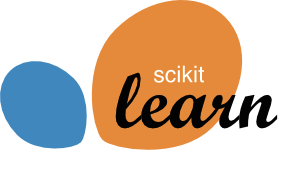

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

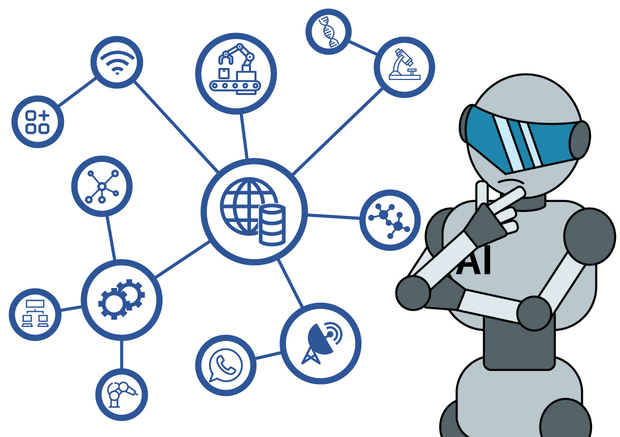

### 이번 단원에서는 머신러닝을 이용하여, 간단한 분류 모델을 만들어보겠습니다.

　　오늘은 머신러닝의 기본적인 함수들을 제공하는 파이썬의 `scikit-learn` 패키지를 이용하여 옷이나 신발 등의 패션 아이템을 분류하는 모델을 만들어보겠습니다.   
  머신러닝에는 지도학습, 비지도학습, 강화학습 등 많은 알고리즘이 있습니다. 우리는 이번 단원에서 `지도학습`을 다루겠습니다.

- 참고: 머신러닝과 딥러닝의 차이점은?
</br></br>
머신러닝은 딥러닝을 포괄하는 개념이며 딥러닝보다 더 오래전에 형성된 개념입니다.   
우리가 흔히 생각하는 인공 지능을 구현하는 방법에 관한 모든 것을 포괄하는 개념이 머신러닝이며, 딥러닝은 `인공신경망`이라는 것을 활용한 머신러닝의 많은 방법들 중 하나입니다.   
인공신경망 도입은 인공지능 성능을 크게 개선하였고, 그 기반이 되는 핵심적인 이론은 머신러닝에서 다루어 왔습니다.</br></br> 

## 먼저, 어떤 데이터를 다룰지 살펴볼까요?

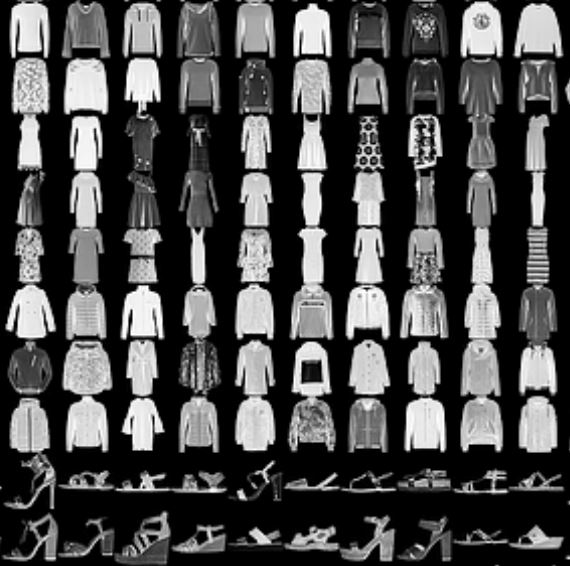

### 1.1 데이터 불러오기
#### 많은 옷들이 나와있죠? 이 데이터의 이름을 Fashion MNIST라고 해보겠습니다. 지금부터 이런 옷을 자동으로 분류하는 모델을 만들어 봅시다!
> 먼저 데이터를 불러오겠습니다. 데이터는 csv파일로 되어있어서 앞서 배웠던 pandas로 불러오겠습니다.
</br>
데이터 불러오기 : pd.read_csv("파일경로")
</br>


In [ ]:
# 예제 1 : 판다스를 이용하여 데이터를 불러오기

file_path = "./fashionMNIST.csv"
data = pd.read_csv(file_path)
data = data[:30000] # 메모리 용량으로 인하여 30000개의 데이터만을 사용합니다.
data

> 대부분 0으로 채워진 panel 데이터가 보입니다. 표 아래에 보면, 30000 x 786 이라는 표시가 있습니다. </br>
  이 표시는 데이터가 `30000 줄, 786 열` 로 이루어져 있다는 뜻입니다. 즉 패션 `아이템의 개수가 30000개`라는 뜻이며, `786은 아이템 한 개가 가진 숫자의 개수`입니다.

### 1.2 지도 학습에 맞추어 데이터 나누기
> 데이터를 다루기 전에 먼저 '학습'이라는 개념을 한번 생각해보겠습니다. 지도학습에서`학습`이라는 개념이란 무엇일까요? 
</br></br>
- 지도학습에서 학습이란?</br></br>
: 지도 학습은 `데이터 간의 함수 관계`를 배우는 것을 목표로 합니다. 예를 들어, `y=2x` 라는 함수를 학습한다고 해보겠습니다. 우리가 가진 데이터는 x = [1, 2, 3, 4, 5, 6, 7],  y = [2, 4, 6, 8, 10, 12, 14] 이렇게 있다고 해보겠습니다. 여기서 `x는 Input`, `y는 Output`에 해당합니다. </br></br>
 지도 학습은 (x, y)의 관계가 (1, 2), (2, 4), ... (7, 14) 이러한 관계가 있음을 반복적인 학습을 통해 파악합니다. </br> 학습이 잘 되면 `학습할 때는 없었던` 데이터인 `x=10을 입력`으로 주었을 때, `y=20`이라고 예측하게 됩니다.

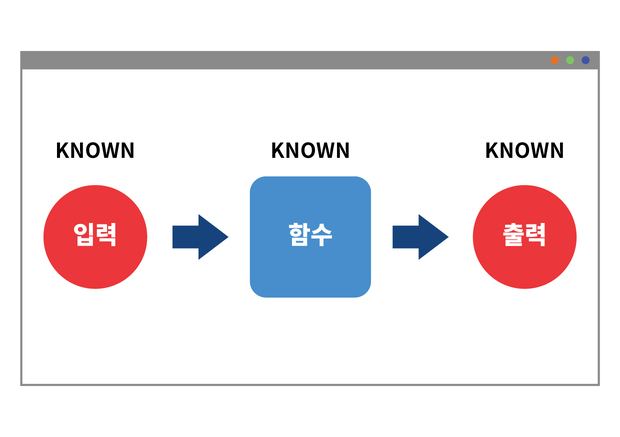

> 따라서 우리는 fashion MNIST 데이터를 x, y의 관계를 가지도록 데이터를 나눠주어야 합니다. 마치 위의 예에서 (1, 2), (2, 4) 등의 데이터가 주어진 것처럼. fashion MNIST도 `여러 숫자 데이터를 x로, 아이템 이름을 y`로 데이터를 만들어주어야 합니다. </br></br>
이를 위해 우선 주어진 데이터의 5줄만 살펴보겠습니다. 판다스의 head() 명령어는 상위 5줄을 보여줍니다.

In [ ]:
data.head()

#### 데이터 파악하기
<!-- 열의 이름을 보니, 첫 줄은 `id`, 두 번째 줄은 `Category`가 나와있습니다. `id`는 각각의 아이템에 숫자를 부여한 것이므로 데이터 자체와 무관합니다.  -->
<!-- > `Category`는 아이템 명을 숫자로 표시한 것이고 이 열이 함수에서는 y값이 됩니다. 이 열의 오른쪽 부터는 Pixel000부터 `Pixel###` 이러한 이름이 보입니다. 이 값들은 각 아이템 이미지의 픽셀 값을 나타내며, x값에 대응됩니다. </br></br>
즉, `각 이미지 픽셀 값(x)`을 모델에 보여주면 해당 아이템이 `어떤 Category에 속하는지(y)`를 맞추는 모델을 지도학습을 통해 만들어보겠습니다. -->
각 열의 의미는 다음과 같습니다.
* `id`: 각 데이터를 구분하기 위한 구분자입니다. 실제 훈련에는 사용되지 않는 값입니다.
* `Category`: 그림이 어떤 패션아이템인지를 의미합니다. 예를 들어, 해당 column의 값이 4인경우, 해당 그림은 코트에 해당합니다. 우리가 풀 문제의 정답에 해당하는 라벨이라고 부릅니다.
* `Pixel000` ~ `Pixel783`: 각 그림은 28 x 28 크기의 이미지로 각 픽셀은 흰색~검은색 중 어느 값에 가까운지를 나타냅니다. 숫자가 작을수록 검은색, 클수록 흰색을 나타냅니다. 
*  하나의 이미지에는 총 784(=28 x 28)개의 픽셀이 존재하므로 한 열당 784개의 픽셀 값이 주어집니다. 아래 그림은 이미지가 4 x 4일때 데이터가 어떻게 나타나는지에 대한 예시입니다. 참고해주세요!

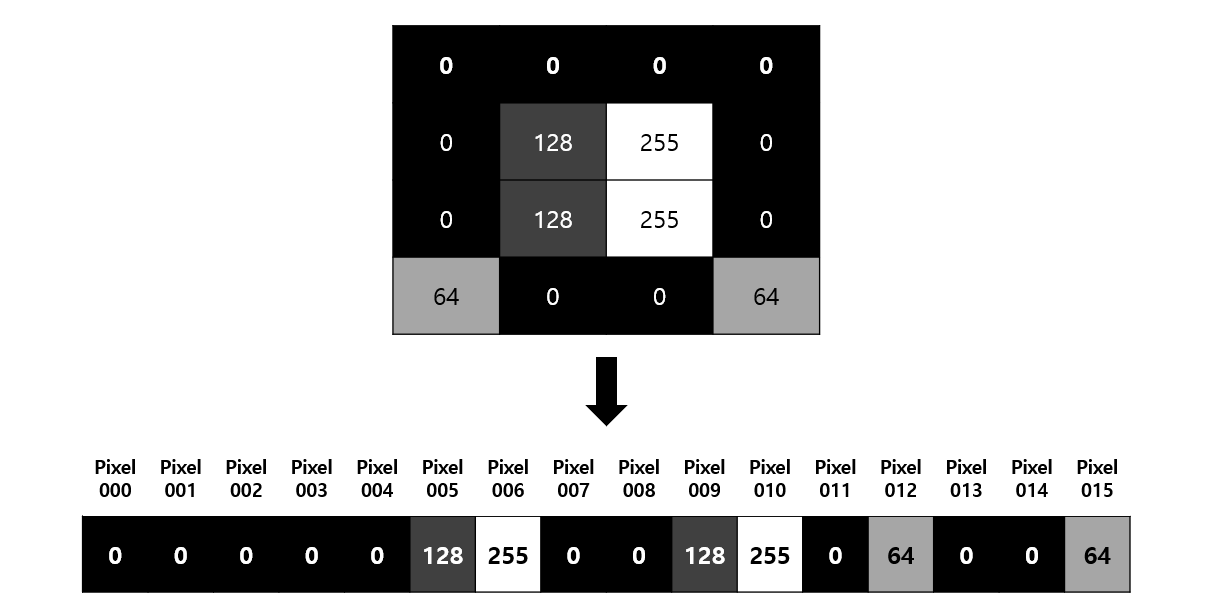
<!-- ![image.png](attachment:2bd064ed-5f81-4096-b6f3-a108d4ea98a2.png) -->

#### 문제 정의하기
> 우리는 이미지 데이터로 하여금 이미지가 어느 종류의 옷에 속하는지를 맞추는 문제를 정의하려고 합니다. 이 경우 문제로 주어진 데이터는 이미지의 픽셀 데이터(`Pixel000` ~ `Pixel783`)이고 이에 상응하는 답은 `Category`가 될겁니다.

#### 데이터를 x, y 관계 데이터로 나누어주기
> 앞서 정의된 문제를 위해서 주어진 데이터를 문제와 답으로 나누어봅시다. Pandas dataframe은 열의 이름을 표기하여 해당 열의 데이터를 가지고 올 수 있으며, drop 명령어를 통해 지울 수도 있습니다.
</br>
</br>
데이터 지우기 : dataframe 변수.drop([인덱스 이름 1, 인덱스 이름 2, ..], axis=0 또는 1), `axis`는 0은 행, 1은 열을 나타냅니다.

In [ ]:
# 예제 2 : x와 y 데이터 나누기

x_data = data.drop(["id", "Category"], axis=1) # 훈련에 사용되지 않는 'id'열과 ouput에 해당하는 'Category'열을 지우고 x_data에 저장해줍니다.  
y_data = pd.DataFrame(data["Category"]) # output에 해당하는 'Category'열을 가지고 와 y_data에 저장해줍니다. 

In [ ]:
x_data.head()

In [ ]:
y_data.head()  

#### 인간의 입장에서 숫자 데이터로는 어떤 패션 아이템인지 알아보기 힘듭니다.   
> 따라서 y 데이터의 각 숫자에 해당 아이템 이름을 부여하겠습니다. 앞선 시간에 배웠던 판다스의 map 함수를 활용하겠습니다.
</br></br>
map함수 활용법 : dataframe.map(딕셔너리 변수), 딕셔너리 변수: 각 y data의 숫자에 대응하는 아이템 이름을 넣은 딕셔너리 변수
</br></br>
기존 dataframe에 새로운 열 삽입하기 : dataframe['새로운 열 이름'] = 데이터

In [ ]:
# 예제 3 : 각 카테고리별 이름과 y data의 숫자를 연결하기

categoryMap={0 :'T-shirt/Top',
             1 :'Trouser',
             2 :'Pullover',
             3 :'Dress',
             4 :'Coat',
             5 :'Sandal',
             6 :'Shirt',
             7 :'Sneaker',
             8 :'Bag',
             9 :'Ankle boot'
            }

y_data['Item_Name'] = data['Category'].map(categoryMap)

In [ ]:
y_data

### 1.3 데이터 살펴보기
> x와 y 데이터의 관계, y데이터와 각 아이템 이름의 관계 등이 적절하게 구성되어있는지 확인해보겠습니다. matplotlib 패키지를 활용하여 이미지를 표시해봅시다. </br></br>
여러 이미지를 한번에 표시하기 : `fig, axes = plt.subplots(<행 개수>, <열 개수>)` : 총 이미지 개수를 `<행 개수> X <열 개수>`로 표현합니다. </br>
　　`axes[i,j]` : i행, j열의 그래프 객체. --> `axes[1,1].imshow(이미지 데이터)` : 2번째 행, 2번째 열에 이미지 데이터를 표시 </br></br>
  `x_data`는 784개의 숫자로 이루어진 1차원 벡터이지만, 이미지로 보기 위해서는 28x28의 2차원 데이터로 바꿔주어야 합니다. 이를 위해서 앞선 시간에 배웠던 배열의 형태를 reshape이라는 함수로 바꿔주어야 합니다. </br></br>
  1차원 배열 2차원으로 바꾸기 : `arr.reshape(28, 28)` 

In [ ]:
# 이 부분은 자세하게 다루는 것보다 빠르게 데이터 구성만 보는 것이 목적이므로 따로 예제로 하지 않았습니다.

rows = 3
cols = 3

# 여러 그래프를 한번에 그리기
# subplots는 rows, cols를 통해서 한번에 여러 figure를 그릴 수 있도록 해줍니다.
fig, axes = plt.subplots(rows, cols, figsize=(12,12))

for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(x_data.values.reshape((x_data.shape[0], 28, 28))[i*cols+j], cmap=plt.get_cmap('gray'))
        axes[i, j].set_title("class " + str(y_data['Category'][i*cols+j]) + ": "+ y_data['Item_Name'][i*cols+j])
plt.show()

> 이미지의 이름과 아이템 이미지를 확인해보니 확실히 잘 매칭이 되어 있음을 볼 수 있습니다! 

### 1.4 데이터를 학습 데이터와 검증 데이터로 나누기
> 머신러닝이나 딥러닝은 학습을 한 결과를 검증하기 위해서, 학습 데이터와는 별도의 데이터를 항상 준비해놓아야 합니다. </br>
scikit learn에서 제공하는 `train_test_split`함수를 활용해보겠습니다. </br></br>
함수 활용법 : train_test_split(x데이터, y데이터, test_size=테스트 데이터 비율)</br></br>
테스트 데이터는 별도의 파일에 있으므로 현재는 `테스트 데이터/검증 데이터로만` 나누겠습니다.

- **학습 데이터와 검증 데이터 나누는 이유?** </br>
: 앞선 y=2x의 예를 들어보겠습니다. 학습 데이터가 x:[1,2,3], y=[2,4,6] 이었다고 가정해보겠습니다. 모델은 (1, 2), (2, 4), (3, 6) 관계를 잘 학습하여서, 입력으로 1을 주면 2를 맞춘다고 해보겠습니다. 하지만, x=10을 주었을 때 y=20을 맞추지 못한다면 학습이 성공적이라고 할 수 있을까요? </br></br>
학습 데이터 이외의 데이터를 맞추지 못한다면 우리는 모델이 제대로 학습했다고 말할 수 없을 겁니다. 이처럼, 검증 데이터는 학습 데이터와는 별도의 데이터를 두어 모델 학습이 잘 되었는지 확인하기 위해 꼭 필요합니다.</br></br>
- **학습 데이터와 검증 데이터는 어떻게 나눌까?** </br>
일반적으로 총 데이터의 `7~8할을 학습`에, `2~3할을 검증`에 활용합니다. 일반적으로 데이터의 총 개수가 많을수록 검증 데이터의 비율을 적게 합니다.</br></br>
- **테스트 데이터는 언제쓰이나?** </br>
테스트 데이터는 검증 데이터를 통해 최적의 모델을 찾은 후 최종적으로 모델을 테스트 할 때 쓰입니다. 

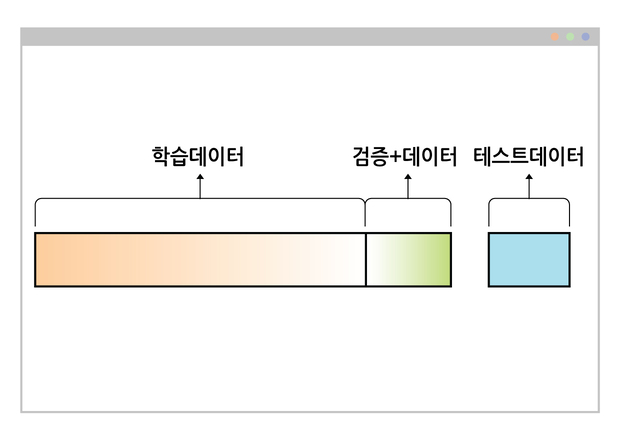

In [ ]:
# 예제 4 : 데이터 나누기

test_ratio = 0.2 # 총 데이터의 20%를 검증 데이터로 설정

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size = test_ratio)

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

### 1.5 데이터 전처리 - 정규화(Normalization) or 표준화(Standardization)
> 학습에 적절한 데이터로 만들어주는 과정을 데이터 전처리라고 합니다.</br></br> 예를 들어, 아래의 Fashion MNIST 데이터를 살펴보면, 대부분은 0으로 채워져 있고 그 외에는 정수로 130, 177, 148 등이 보입니다. 데이터의 숫자 분포가 이처럼 균일하지 않게 어느 한쪽으로 (현재 데이터는 0이 매우 많은) 편향되어 있으면 학습하기에 적절하지 않습니다. </br>
</br>이 때 `데이터를 0~1 사이로 다시 맞춰주는 작업`을 `정규화(Normalization)`라고 부르고, `데이터를 정규 분포로 맞춰주는 작업`을 `표준화(Standardization)`라고 합니다.

In [ ]:
x_train.head()

- 정규화와 표준화의 차이를 수식으로 살펴보기 </br>
: 정규화(normalization)는 다음과 같은 공식을 사용해서 특성 값의 범위를 [0, 1]로 옮깁니다. 

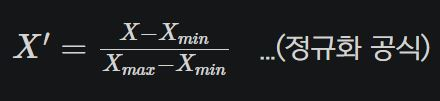

> 이 공식을 사용하면 전체 데이터에 가장 큰 값은 1로, 가장 작은 값은 0으로 변환됩니다. Fashion MNIST에서는 픽셀 값의 가장 큰 값이 255, 작은 값이 0이므로 `Xmax=255, Xmin=0`이 됩니다.</br>
이 관계식을 이용해서 데이터를 변환해주면 모든 이미지 픽셀 갑이 [0, 1]의 범위를 가집니다. 
 
> 한편, 표준화(standardization)는 아래의 공식으로 데이터를 변환합니다.

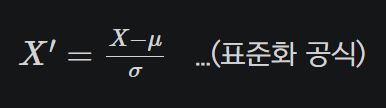

> 여기서 μ는 데이터의 평균 값이고, σ는 표준편차입니다. 이 공식이 익숙하신 분들도 있을 것 같습니다. 수학 시간에 배운 혹은 배우게 될 `정규분포의 표준화` 공식입니다. </br>
표준화란 데이터의 평균을 0으로, 표준편차를 1이 되도록 변환해줍니다. 우리는 이번에 표준화를 해보겠습니다.

> 참고 : 현재 우리의 데이터는 판다스의 Dataframe 입니다. 이를 numpy로 변환하기 위해서는 `변수명.values` 를 활용합니다. numpy의 mean 함수를 활용하여 평균값을 구할 떄는, `x_train.values`로 numpy 배열 데이터로 변환하여 입력으로 넣어주어야 합니다.

In [ ]:
# 예제 5 : 데이터의 표준화를 위해 Fashion MNIST의 평균과 표준편차 구하기

x_mean =  np.mean(x_train.values)
x_std = np.std(x_train.values)

print("표준화 전 학습 데이터")
print("평균 : ", x_mean)
print("표준편차 : ", x_std)

In [ ]:
# 예제 6 : 평균과 표준편차 값을 활용하여, 위의 표준화 공식에 대입하여 학습 데이터 표준화하기

x_train = (x_train - x_mean) / x_std  # 표준화 시킵니다. 

print("표준화 이후 학습 데이터")
print("평균 : ", np.mean(x_train.values))
print("표준편차 : ", np.std(x_train.values))

- 검증 데이터는 표준화를 어떻게 할까?

> 검증 데이터의 표준화 혹은 정규화는 검증 데이터의 통계값(평균, 표준편차, 최대값, 최소값)을 활용해서는 안됩니다. 검증 데이터의 역할이 무엇이었지요? 학습 과정이 잘 되었는지 검증하는 역할입니다. 따라서 `검증 데이터의 정보는 학습 과정에도 검증 과정에서 사전에 활용되어서는 안됩니다.` </br></br>
아래 예제에서는 검증 데이터를 위에서 구한 학습 데이터의 평균, 표준편차를 이용하여 표준화해보겠습니다.

In [ ]:
# 예제 7 : 위에서 구한 학습의 평균과 표준편차를 이용하여 검증 데이터 표준화하기

x_val = (x_val - x_mean) / x_std

print("표준화 이후 학습 데이터")
print("평균 : ", np.mean(x_val.values))
print("표준편차 : ", np.std(x_val.values))

#### 위와 같이 표준화를 하면 이미지는 어떻게 보일까요?
> plt.imshow(원하는 데이터)  함수를 통해 확인할 수 있습니다. 

> numpy 배열은 reshape을 통해서 형태를 바꿀 수 있음을 배웠습니다. 현재 x_data는 784차원의 1차원 데이터이지만, 이를 이미지로 보기 위해서는 2차원 배열로 바꿔주어야 합니다. 이미지는 28x28 크기를 가집니다. </br></br>
따라서 .reshape(28, 28)을 통해서 바꿔서 .imshow()함수에 입력합니다.

In [ ]:
# 예제 8 : 표준화 작업 이후의 아이템 이미지 살펴보기

sample_idx = 10000 # 데이터 인덱스 (자유롭게 선택해보세요)

plt.imshow(x_data.values[sample_idx].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.title(y_data['Item_Name'][sample_idx])
plt.show()

#### 데이터는 준비되었으니, 이제부터 scikit learn에서 제공하는 함수를 통해 학습을 해보겠습니다.